I'm looking at two data sources:

1, List of cities by GDP: from (https://en.wikipedia.org/wiki/List_of_cities_by_GDP), extracted as table1.csv
2, List of North American cities by number of major sports championships: from(https://en.wikipedia.org/wiki/List_of_North_American_cities_by_number_of_major_sports_championships), extracted as table2.csv


The question I'm asking is: Does a city's economy status correlate to its ability to win championships with its major sport teams?

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

GDP=pd.read_csv('table1.csv')
GDP.head()

,City/Metropolitan area,Country/Region,UNSDsub‑region[1],Official est.NominalGDP ($BN),Brookings Institution[2]2014 est.PPP-adjustedGDP ($BN),PwC[3]2008 est.PPP-adjustedGDP ($BN),McKinsey[4]2010 est.NominalGDP ($BN),Other est.NominalGDP ($BN)
0,Aachen-Liège-Maastricht,Germany Belgium Netherlands,Western Europe,NaN,99.7,NaN,NaN,NaN
1,Aberdeen,United Kingdom,Northern Europe,11.3 (2008)[5],NaN,NaN,NaN,NaN
2,Abidjan,Ivory Coast,Africa,NaN,NaN,13,NaN,NaN
3,Abu Dhabi,United Arab Emirates,Western Asia,119[6],178.3,NaN,67.1,NaN
4,Addis Ababa,Ethiopia,Africa,NaN,NaN,12,NaN,NaN


Clean up GDP data

In [2]:
GDP=GDP[GDP['Country/Region'] == 'United States']
GDP.columns=[0,1,2,3,4,5,6,7]
GDP = GDP.drop(GDP.columns[[1,2,7]], axis=1)
GDP.columns=['City', 'Official', 'Brookings2014', 'PwC2008','McKinsey2010']

GDP.head()

,City,Official,Brookings2014,PwC2008,McKinsey2010
7,Akron,37.300 (2016)[8],32.8,NaN,NaN
8,Albany,52.339 (2016)[8],58.4,NaN,NaN
9,Albuquerque,43.250 (2016)[8],39.9,NaN,NaN
12,Allentown,42.700 (2016)[8],37.3,NaN,NaN
20,Atlanta,385.542 (2017)[8],294.4,304,249.7


In [3]:
GDP['Official'] = GDP['Official'].str.replace(r"\(.*","")
GDP['Official'] = GDP['Official'].str.replace(r"\,","")
GDP.head(50)

,City,Official,Brookings2014,PwC2008,McKinsey2010
7,Akron,37.300,32.8,NaN,NaN
8,Albany,52.339,58.4,NaN,NaN
9,Albuquerque,43.250,39.9,NaN,NaN
12,Allentown,42.700,37.3,NaN,NaN
20,Atlanta,385.542,294.4,304,249.7
22,Austin,148.750,107.4,NaN,NaN
23,Bakersfield,35.162,47.9,NaN,NaN
25,Baltimore,192.178,173.7,137,NaN
32,Baton Rouge,51.149,53.5,NaN,NaN
41,"Birmingham, Alabama",62.758,54.164,NaN,NaN


In [20]:
champs=pd.read_csv('table2.csv')
champs.columns=[0,1,2,3,4,5,6,7,8]
champs = champs.drop(champs.columns[[0,2,3]], axis=1)
champs.columns=['City', 'MLB World Series', 'NBA Champions', 'NFL/AFL Champions','NHL Stanley Cups','4 Major Sports Championships']
champs['NFL/AFL Champions']=champs['NFL/AFL Champions'].str.replace(r"\[.*","")
champs.head()


,City,MLB World Series,NBA Champions,NFL/AFL Champions,NHL Stanley Cups,4 Major Sports Championships
0,New York City,35,2,5,8,50
1,Boston,10,17,6,6,39
2,Chicago,6,6,11,6,29
3,Los Angeles,5,11,2,2,25
4,Montreal,0,-,-,24,24


In [21]:
m=pd.merge(champs, GDP, how='inner', left_on='City', right_on='City')
cols = [ 'Official', 'Brookings2014', 'NFL/AFL Champions','PwC2008','McKinsey2010','MLB World Series','4 Major Sports Championships','NBA Champions','NHL Stanley Cups']
m[cols] = m[cols].apply(pd.to_numeric, errors='coerce', axis=1)
m

,City,MLB World Series,NBA Champions,NFL/AFL Champions,NHL Stanley Cups,4 Major Sports Championships,Official,Brookings2014,PwC2008,McKinsey2010
0,Boston,10.0,17.0,6.0,6.0,39.0,438.684,360.100,363.0,NaN
1,Chicago,6.0,6.0,11.0,6.0,29.0,679.699,563.200,574.0,496.4
2,Los Angeles,5.0,11.0,2.0,2.0,25.0,1043.735,860.500,792.0,731.8
3,Detroit,4.0,3.0,4.0,11.0,22.0,260.612,207.500,253.0,NaN
4,Philadelphia,7.0,4.0,5.0,2.0,18.0,444.975,346.500,388.0,314.5
5,Pittsburgh,5.0,0.0,6.0,5.0,16.0,147.367,138.400,99.0,NaN
6,St. Louis,11.0,1.0,1.0,1.0,14.0,161.281,140.600,126.0,NaN
7,Baltimore,3.0,1.0,5.0,NaN,9.0,192.178,173.700,137.0,NaN
8,Cleveland,2.0,1.0,6.0,0.0,9.0,138.980,115.100,112.0,NaN
9,Minneapolis/St. Paul,2.0,5.0,1.0,0.0,8.0,260.106,211.400,194.0,NaN


<IPython.core.display.Javascript object>


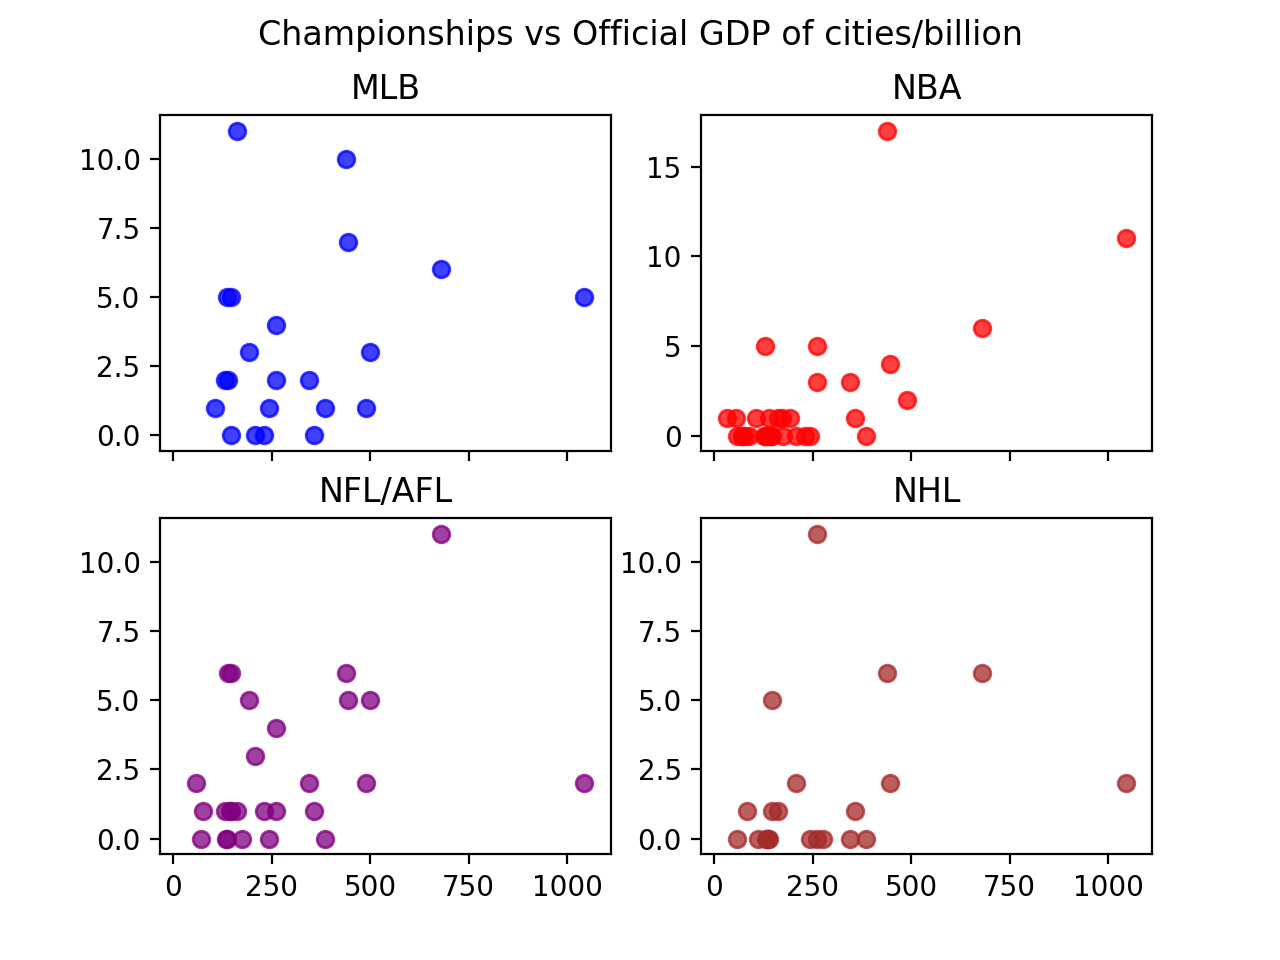

Text(0.5, 1.0, 'NHL')

In [58]:
import seaborn as sns

x=m['Official']
y1=m['4 Major Sports Championships']
y2=m['MLB World Series']
y3=m['NBA Champions']
y4=m['NFL/AFL Champions']
y5=m['NHL Stanley Cups']
fig, ((ax2, ax3), (ax4,ax5)) = plt.subplots(2,2, sharex=True)
fig.suptitle('Are rich cities better at sports? ')
fig.suptitle('Championships vs Official GDP of cities/billion')

ax2.scatter(x,y2,color='blue',label='MLB World Series',alpha=0.75)
ax2.set_title('MLB')
ax3.scatter(x,y3,color='red',label='NBA Champions',alpha=0.75)
ax3.set_title('NBA')
ax4.scatter(x,y4,color='purple',label='NFL/AFL Champions',alpha=0.75)
ax4.set_title('NFL/AFL')
ax5.scatter(x,y5,color='brown',label='NHL Stanley Cups',alpha=0.75)
ax5.set_title('NHL')

<IPython.core.display.Javascript object>


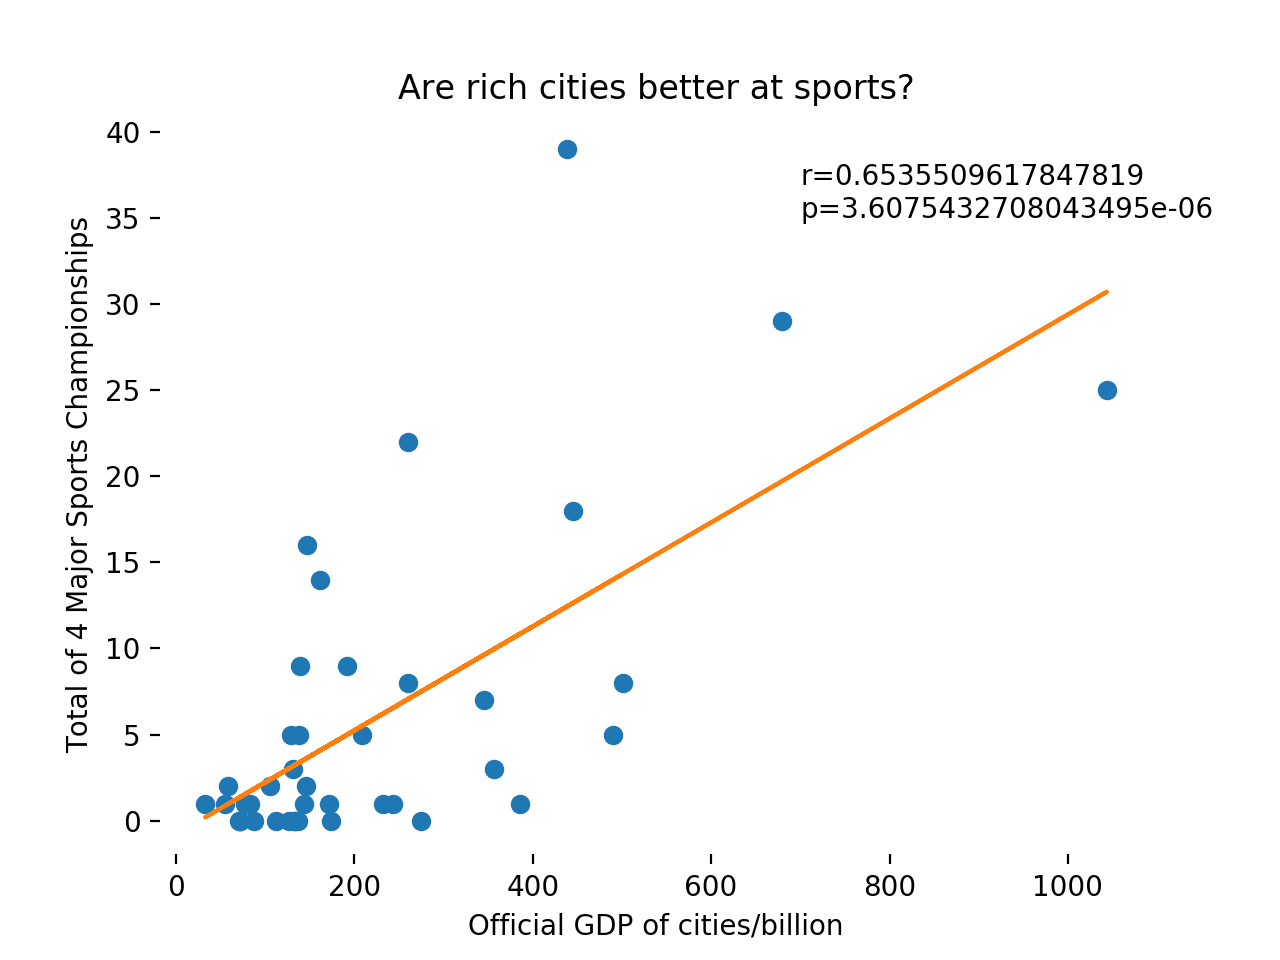

In [65]:
from numpy.polynomial.polynomial import polyfit
from scipy import stats
plt.figure()
b1, n1 = polyfit(x,y1, 1)
plt.plot(x,y1,'o',x, b1 + n1 * x, '-')
r2,p=stats.pearsonr(x, y1)
plt.text(700,35, "r2=0.6535509617847819\np=3.6075432708043495e-06")
plt.title('Are rich cities better at sports?')
plt.ylabel('Total of 4 Major Sports Championships')
plt.xlabel('Official GDP of cities/billion')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()